## Tutorial 4: Synaptic Plasticity and Associative Networks
### February 16, 2023

In [23]:
## Importing libraries
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 1:

#### Considering two vectors with entries uniformly distributed between -1 and 1. We normalize each vector so that it has unit norm. Next, creating a plot illustrating the behavior of the inner product of these vectors as the dimension increases.

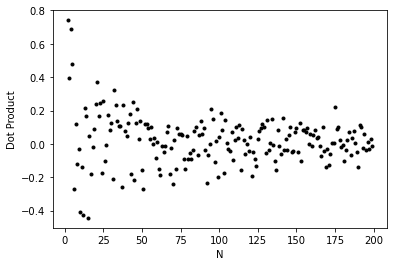

In [32]:
## Defining parameters
N = np.arange(2, 200, step = 1)
d = np.zeros(len(N))

for ii in np.arange(0, len(N)):
    
    ## Creating the two vectors and normalizing
    x1 = 2 * (np.random.rand(N[ii], 1) - 0.5); x1 = x1 / np.linalg.norm(x1)
    x2 = 2 * (np.random.rand(N[ii], 1) - 0.5); x2 = x2 / np.linalg.norm(x2)
    
    ## Computing the dot product
    d[ii] = np.matmul(np.transpose(x1), x2)
    
## Plotting the behaviour
plt.plot(N, d, 'k.')
plt.xlabel('N')
plt.ylabel('Dot Product')
plt.show()

#### Exercise 2:

#### Creating a Hebbian association between one input vector and an output vector. 

In [45]:
## Defining parameters
N = 100
eta = 1

## Creating two random vectors and normalizing
x = 2 * (np.random.rand(N, 1) - 0.5); x = x / np.linalg.norm(x)
y = 2 * (np.random.rand(N, 1) - 0.5); y = y / np.linalg.norm(y)

## Constructing Hebbian matrix
A = eta * np.outer(y, x)

## Computing output
y_prime = A @ x

## Verifying the output
output = np.transpose(y) @ y_prime

## Printing output
print(output)

[[1.]]


#### Exercise 3:

#### Using the Hebbian associative network and verification of successful recovery from Exercise 2, to find how many associations we can store.

(array([ 1.,  4.,  8., 26., 42., 42., 40., 21., 13.,  3.]),
 array([0.95697815, 0.96501231, 0.97304646, 0.98108062, 0.98911478,
        0.99714894, 1.00518309, 1.01321725, 1.02125141, 1.02928556,
        1.03731972]),
 <BarContainer object of 10 artists>)

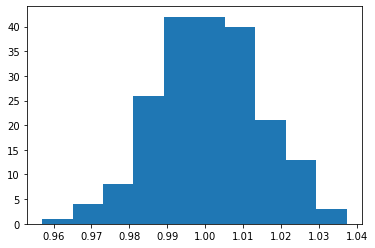

In [55]:
## Defining parameters
N = 1000; M = 200; eta = 1

## Initializing vectors and Hebbian matrix
x = np.zeros((N,M)); y = np.zeros((N,M))
A = np.zeros((N,N)); 

for ii in np.arange(0, M):
    
    ## Creating two random vectors and normalizing
    x[:, ii] = 2 * (np.random.rand(N) - 0.5); x[:, ii] = x[:, ii] / np.linalg.norm(x[:, ii])
    y[:, ii] = 2 * (np.random.rand(N) - 0.5); y[:, ii] = y[:, ii] / np.linalg.norm(y[:, ii])
    
for ii in np.arange(0, M):
    
    ## Constructing Hebbian matrix
    A += eta * np.outer(y[:, ii], x[:, ii])
        
ell = np.zeros(M)
for ii in np.arange(0, M):
    y_prime = A @ x[:, ii]
    ell[ii] = np.abs(y[:, ii] @ y_prime)

plt.hist(ell)